<a href="https://colab.research.google.com/github/BuiChiCuongs/BT_AI_W9_Cifar/blob/main/AI_W9_Cifar100_31_3_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from keras.datasets import cifar100


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x=x_test
y=y_test

169001437/169001437 [==============================] - 3s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape


(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

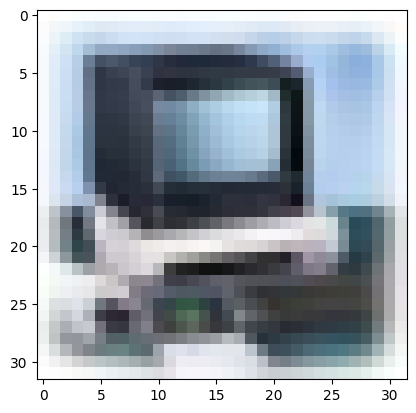

So nay la:  [87]


In [ ]:
digit = x_train[28070]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print('So nay la: ', y_train[28070])

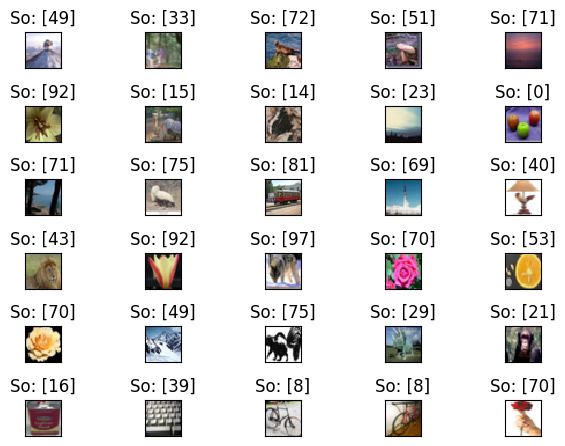

In [ ]:
for i in range(30):
  plt.subplot(6,5,i+1)  #ve hinh co 5hang 5cot, i+1: vi tri tuong tac
  plt.tight_layout()
  plt.imshow(x_test[i],cmap='gray',interpolation='none')
  plt.title('So: {}'.format(y_test[i])) # gan nhan cho so
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(2000,activation = 'relu', input_shape = (3072,))) 

In [ ]:
model.add(Dense(100, activation = 'Softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              6146000   
                                                                 
 dense_1 (Dense)             (None, 100)               200100    
                                                                 
Total params: 6,346,100
Trainable params: 6,346,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape(50000, 32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000, 32*32*3)
x_test = x_test.astype('float32')/255

In [ ]:
x_train.shape

(50000, 3072)

In [ ]:
x_test.shape

(10000, 3072)

In [ ]:
from keras.utils import to_categorical        
y_train = to_categorical(y_train, 100)  
y_test = to_categorical(y_test, 100)

In [ ]:
y_train.shape

(50000, 100)

In [ ]:
y_test.shape

(10000, 100)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size=500)  

Epoch 1/10
100/100 [==============================] - 49s 489ms/step - loss: 4.1947 - accuracy: 0.0667
Epoch 2/10
100/100 [==============================] - 37s 367ms/step - loss: 3.9001 - accuracy: 0.1084
Epoch 3/10
100/100 [==============================] - 34s 336ms/step - loss: 3.7518 - accuracy: 0.1343
Epoch 4/10
100/100 [==============================] - 32s 324ms/step - loss: 3.6591 - accuracy: 0.1511
Epoch 5/10
100/100 [==============================] - 33s 332ms/step - loss: 3.5781 - accuracy: 0.1645
Epoch 6/10
100/100 [==============================] - 33s 326ms/step - loss: 3.5014 - accuracy: 0.1794
Epoch 7/10
100/100 [==============================] - 34s 336ms/step - loss: 3.4506 - accuracy: 0.1872
Epoch 8/10
100/100 [==============================] - 33s 332ms/step - loss: 3.3908 - accuracy: 0.1992
Epoch 9/10
100/100 [==============================] - 35s 349ms/step - loss: 3.3433 - accuracy: 0.2072
Epoch 10/10
100/100 [==============================] - 32s 325ms/step - l

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Mat mat: ', test_loss)
print('Do chinh xac:', test_acc)

313/313 [==============================] - 9s 26ms/step - loss: 3.5110 - accuracy: 0.1871
Mat mat:  3.5109922885894775
Do chinh xac: 0.18709999322891235


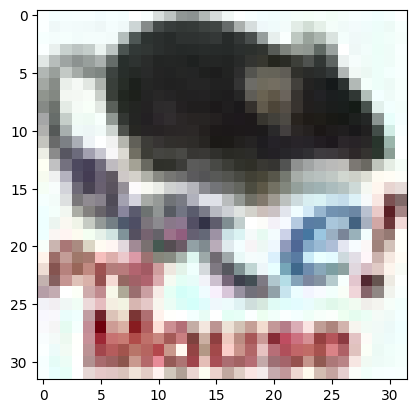

[50]


In [ ]:
img = x[1500]
plt.imshow(img)
plt.show()
print(y[1500])

In [ ]:
X_pred = x[1500].reshape(1,32*32*3)
X_pred=X_pred.astype('float32')/255
np.argmax(model.predict(X_pred), axis=-1)

1/1 [==============================] - 0s 97ms/step


array([97])

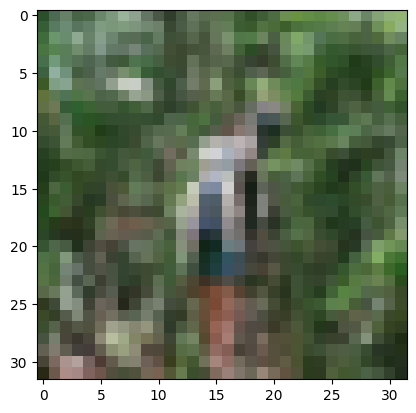

[33]


In [ ]:
img = x[2002]
plt.imshow(img)
plt.show()
print(y[2002])

In [ ]:
X_pred = x[2002].reshape(1,32*32*3)
X_pred=X_pred.astype('float32')/255
np.argmax(model.predict(X_pred), axis=-1)

1/1 [==============================] - 0s 84ms/step


array([33])

In [ ]:
model.save('cifar100_model.h5')

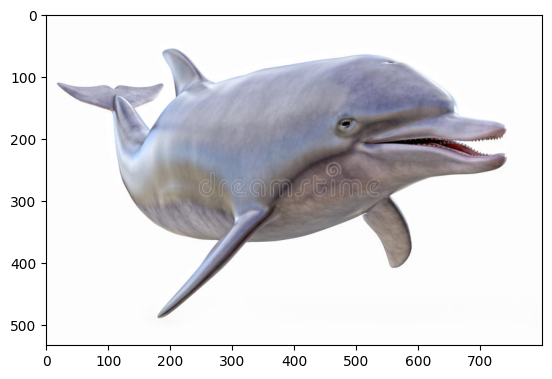

In [ ]:
url = '/content/dolphin.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

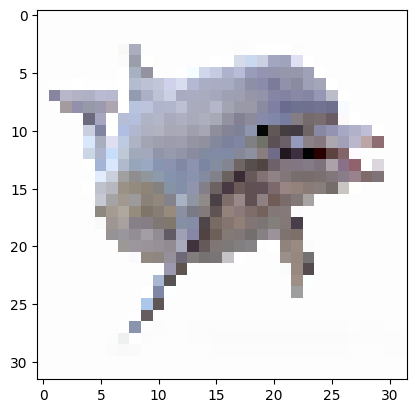

In [ ]:
from keras.utils import load_img, img_to_array
img = load_img(url, target_size = (32,32))
plt.imshow(img)

In [ ]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 30ms/step


array([20])

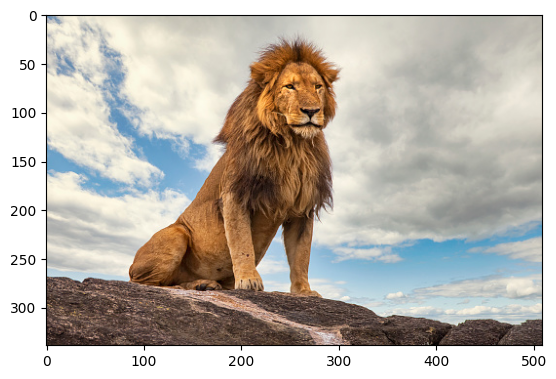

In [ ]:
url = '/content/lion.jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

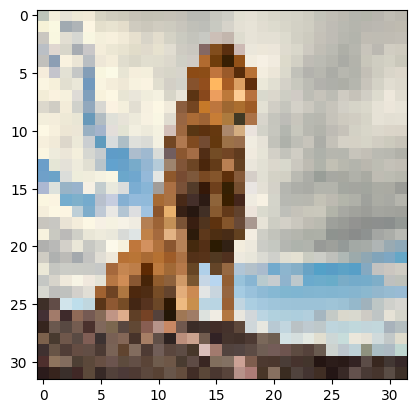

In [ ]:
from keras.utils import load_img, img_to_array
img = load_img(url, target_size = (32,32))
plt.imshow(img)

In [ ]:
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 46ms/step


array([9])